In [1]:
!pip install tensorflow


# Importing required libraries

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np


# Loading the Dataset

In [3]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize the pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Print the shape of the datasets
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
x_train shape: (50000, 32, 32, 3), y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3), y_test shape: (10000, 1)


# Visualizing the Dataset

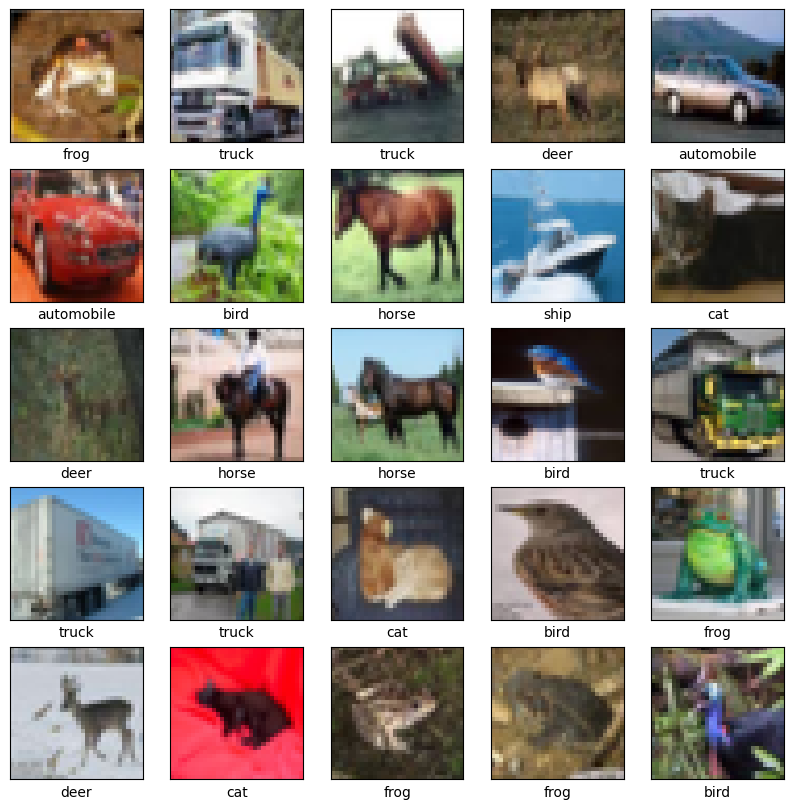

In [4]:
# Define class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Plot first 25 images from the training set
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([]), plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i][0]])
plt.show()


# CNN Model Creation

In [5]:
# Create the model
model = models.Sequential()

# Layer 1: Conv2D with 32 filters
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))

# Layer 2: Conv2D with 64 filters
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))

# Layer 3: MaxPooling with a pool size of (2, 2)
model.add(layers.MaxPooling2D(pool_size=(2, 2)))  # Output: 64 x 16 x 16

# Layer 4: Conv2D with 128 filters
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))

# Layer 5: Conv2D with 128 filters
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))

# Layer 6: MaxPooling with a pool size of (2, 2)
model.add(layers.MaxPooling2D(pool_size=(2, 2)))  # Output: 128 x 8 x 8

# Layer 7: Conv2D with 256 filters
model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))

# Layer 8: Conv2D with 256 filters
model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))

# Layer 9: MaxPooling with a pool size of (2, 2)
model.add(layers.MaxPooling2D(pool_size=(2, 2)))  # Output: 256 x 4 x 4

# Flatten the output from convolutional layers
model.add(layers.Flatten())  # Output: 256 * 4 * 4 = 4096

# Layer 10: Dense layer with 1024 units
model.add(layers.Dense(1024, activation='relu'))

# Layer 11: Dense layer with 512 units
model.add(layers.Dense(512, activation='relu'))

# Layer 12: Output layer with 10 units (for 10 CIFAR-10 classes) and softmax activation
model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
#used 'adam' optimizer and 'sparse categorical crossentropy' loss function
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Model Evaluation

In [7]:
history = model.fit(x_train, y_train, epochs=20,
                    validation_split=0.2, batch_size=64)


Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 24ms/step - accuracy: 0.2229 - loss: 2.0146 - val_accuracy: 0.4878 - val_loss: 1.3924
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.5249 - loss: 1.2949 - val_accuracy: 0.5985 - val_loss: 1.1156
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.6414 - loss: 1.0000 - val_accuracy: 0.7059 - val_loss: 0.8372
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.7255 - loss: 0.7746 - val_accuracy: 0.7211 - val_loss: 0.7981
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.7747 - loss: 0.6387 - val_accuracy: 0.7472 - val_loss: 0.7250
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.8159 - loss: 0.5187 - val_accuracy: 0.7321 - val_loss: 0.8113
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.8494 - loss: 0.4249 - val_accuracy: 0.7601 - val_loss: 0.7799
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.8812 - loss: 0.3286 - va

# Test Accuracy

In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7549 - loss: 1.4105
Test accuracy: 74.75%


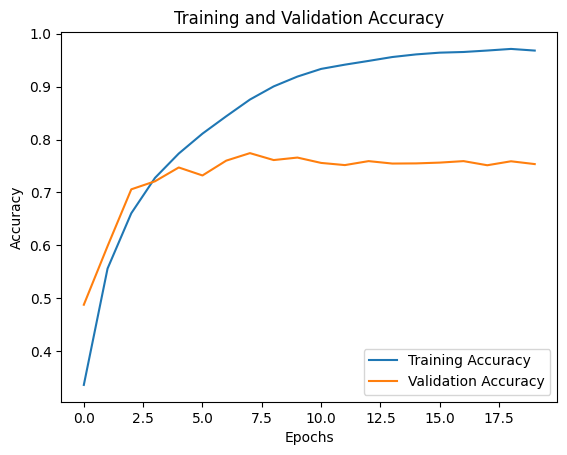

In [9]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

# Testing on a sample

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


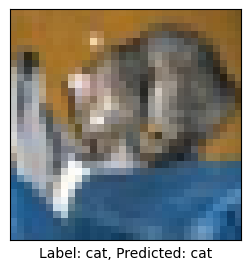

In [10]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([]), plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)

    plt.xlabel(f"Label: {class_names[true_label[0]]}, Predicted: {class_names[predicted_label]}")
    return f"Label: {class_names[true_label[0]]}, Predicted: {class_names[predicted_label]}"

# Make predictions
predictions = model.predict(x_test)

# Plot first test image and print label and prediction
i = 0
plt.figure(figsize=(6,3))
label_prediction = plot_image(i, predictions, y_test, x_test)
plt.show()


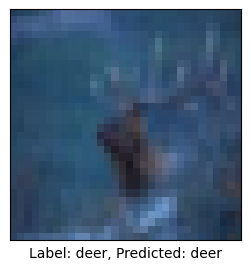

In [11]:
i = 22
plt.figure(figsize=(6,3))
label_prediction = plot_image(i, predictions, y_test, x_test)
plt.show()

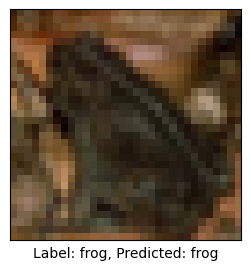

In [12]:
i = 30
plt.figure(figsize=(6,3))
label_prediction = plot_image(i, predictions, y_test, x_test)
plt.show()